## Testing PSFUtils on K2 Data

The K2 mission has motion in the data, causing stars to move over several pixels. We'd like to use this 'jitter' to build a data driven PSF model using PSFutils.

Note to do this you will need `lightkurve`, which is a set of tools to work with Kepler/K2 data. You can install it with 
  
`pip install lightkurve`
  

In [1]:
from lightkurve import KeplerTargetPixelFile
import psfutils
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [4]:
#Download a Target Pixel File for a target
tpf = KeplerTargetPixelFile.from_archive(8462852, quarter=8)

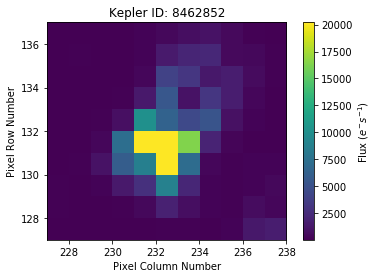

In [6]:
tpf.plot()

In [20]:
#Build a list of star objects based on the first 100 frames of the TPF
stars = []
wcs = tpf.wcs
flux = tpf.flux[1000:1100]# + tpf.flux_bkg[1000:1100]
#Remove NaN and inf values
xblc = tpf.column
yblc = tpf.row
for idx, f in enumerate(tqdm(flux)):
    xcen = tpf.centroids()[0][idx] - xblc
    ycen = tpf.centroids()[1][idx] - yblc
    stars.append(psfutils.Star(f, wcs=wcs, center=(xcen, ycen), pixel_scale=4,
                               blc=(xblc, yblc)))

100%|██████████| 100/100 [00:02<00:00, 36.68it/s]


In [21]:
epsf, fitted_stars, niter = psfutils.iter_build_psf(
    stars, residuals=True, max_iter=20, ker='quad', stat='median', nclip=10)
print("Convergence achieved after {:d} iterations".format(niter))

Convergence achieved after 20 iterations


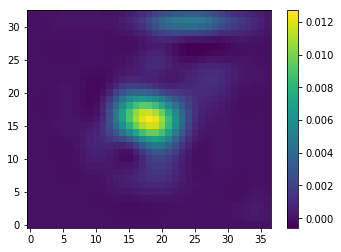

In [22]:
plt.imshow(epsf.data, origin='lower')
plt.colorbar()

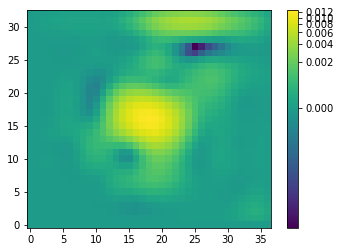

In [23]:
from astropy.visualization import simple_norm
norm = simple_norm(epsf.data, 'log')
plt.imshow(epsf.data, norm=norm, origin='lower')
plt.colorbar()